importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

reading and importing the dataset

In [2]:
df = pd.read_csv('mall_customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


checking for missing values

In [3]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
#this code returns the column labels of this Dataframe.

df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

DATA OVERVIEW

The describe() function computes a summary of statistics pertaining to the DataFrame columns.
This function gives the mean, std and IQR(interquartile range) values.
And, function excludes the character columns and given summary about numeric columns

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000



checking the dataset which shows us the dtypes, features and also null values.(there are no missing values)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


There's a mistake in 'gender' column, its written as 'genre'. we'd use pandas.rename() to fix that mistake

In [7]:
df.rename({"Genre": "Gender"}, axis = 1, inplace =True)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
#Value count of Gender
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [9]:
len(df[df.Age<20])

12

In [10]:
len(df[(df['Age']>30) & (df['Annual Income (k$)']<15)])

0

In [11]:
len(df[(df['Gender']=='Female') & (df['Annual Income (k$)']>30)])

94

it is observed that out of the 112 female customers, 94 of them earn above above $30,000

# Data preprocessing

creating a LabelEncoder object

In [13]:
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()
#invoking fit_transform method on object
df['Gender']=le.fit_transform(df['Gender'])

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


Descriptive statistics and visualization

In [14]:
type(df['Gender'])

pandas.core.series.Series

<AxesSubplot:title={'center':'Count of Males & Females'}, xlabel='Gender', ylabel='count'>

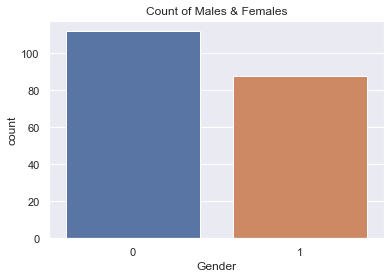

In [16]:
#Countplot of males & females

plt.title('Count of Males & Females')
sns.set(style="darkgrid")
sns.countplot(x = df['Gender'])

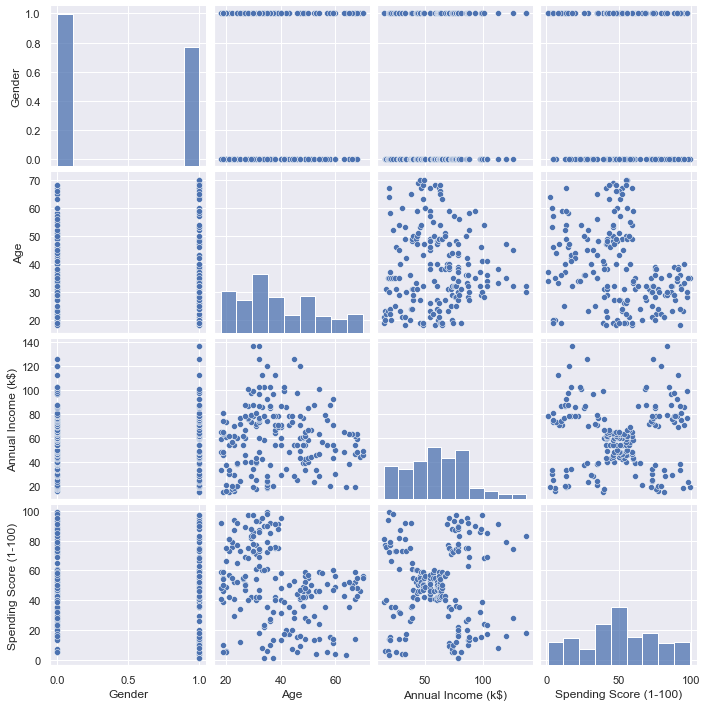

In [18]:
#Finding correlation between features of the dataset

sns.pairplot(df.iloc[:,1:5])

The pair plot shows that middle-aged people earn the most and young to middle-aged people spend the most. Thus they are a good target to focus for new products and advertisement. Spending and earning are more or less uniform for both the genders, so gender neutral products will probably have a good market. Spending Score and Annual income has clear clusters, thus they are good features which can be considered for clustering the customers

We can see that the male customers registered for membership card is about 90, while female customers are about 110.

In [19]:
X = df.iloc[:, [3, 4]]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [21]:
from sklearn.cluster import KMeans
# Fitting  K-Means to the dataset and predicting the clusters
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
#The predicted cluster centers are stored in y_kmeans

In [22]:
#Adding the predicted clusters
X['Centroids'] = y_kmeans

#Now, different observations has been assigned to different cluster centers (centroids)
X

C:\Users\user\AppData\Local\Temp\ipykernel_4272\3050806324.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Centroids'] = y_kmeans


,Annual Income (k$),Spending Score (1-100),Centroids
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2
...,...,...,...
195,120,79,4
196,126,28,1
197,126,74,4
198,137,18,1


Visualising the clusters

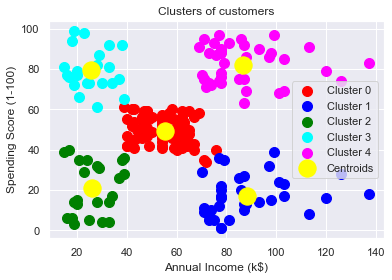

In [23]:
# unzip all values for all column in X DataFrame and store them in x(array)
x = X.values


# x[y_kmeans == 0, 0] is a conditional statement that prints the value of x[i] for all i in X, only if where y_kmeans ==0
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend() #Show labels in all scatter plots as legend
plt.show()

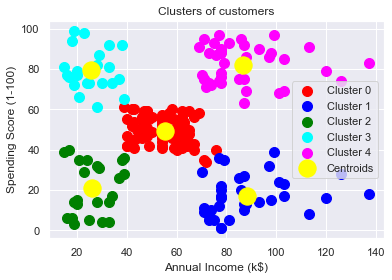

In [24]:
#Visualizing the clusters from DataFrame X

#for datapoints in cluster 0
Income_Cluster_0 = X[X.Centroids == 0]['Annual Income (k$)'] 
Spending_Score_Cluster_0 = X[X.Centroids == 0]['Spending Score (1-100)']
plt.scatter(Income_Cluster_0, Spending_Score_Cluster_0, s = 100, c = 'red', label = 'Cluster 0')

#for datapoints in cluster 1
Income_Cluster_1 = X[X.Centroids == 1]['Annual Income (k$)'] 
Spending_Score_Cluster_1 = X[X.Centroids == 1]['Spending Score (1-100)']
plt.scatter(Income_Cluster_1, Spending_Score_Cluster_1, s = 100, c = 'blue', label = 'Cluster 1')

#for datapoints in cluster 2
Income_Cluster_2 = X[X.Centroids == 2]['Annual Income (k$)'] 
Spending_Score_Cluster_2 = X[X.Centroids == 2]['Spending Score (1-100)']
plt.scatter(Income_Cluster_2, Spending_Score_Cluster_2, s = 100, c = 'green', label = 'Cluster 2')

#for datapoints in cluster 3
Income_Cluster_3 = X[X.Centroids == 3]['Annual Income (k$)'] 
Spending_Score_Cluster_3 = X[X.Centroids == 3]['Spending Score (1-100)']
plt.scatter(Income_Cluster_3, Spending_Score_Cluster_3, s = 100, c = 'cyan', label = 'Cluster 3')


#for datapoints in cluster 4
Income_Cluster_4 = X[X.Centroids == 4]['Annual Income (k$)'] 
Spending_Score_Cluster_4 = X[X.Centroids == 4]['Spending Score (1-100)']
plt.scatter(Income_Cluster_4, Spending_Score_Cluster_4, s = 100, c = 'magenta', label = 'Cluster 4')


#Plot all cluster centroids on their converged datapoints 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

#Give the figure a title called Clusters of customers
plt.title('Clusters of customers')

#Name the X-axis as Annual Income (k$)
plt.xlabel('Annual Income (k$)')

#name the X-axis as Annual Income (k$)
plt.ylabel('Spending Score (1-100)')

#Print all labels in various scatter plots
plt.legend()

#Show all the plots
plt.show()

The features under consideration i.e Annual Score and income spending and the predicted(Centroids)